# Visualization Notebook

This notebook provides example of several different visualizations possible using the Jupyter notebook.

This notebook was created and tested using the following packages and versions:
* Python 3.6.1
* IPython 5.3.0
* Jupyter Notebook 5.0.0
* Matplotlib 2.0.2
* NumpPy 1.12.1
* Seaborn 0.7.1
* Pandas 0.20.1
* Bokeh 0.12.10

NOTE: The versions of Seaborn, Pandas, and Bokeh are most important as features have been deprecated and shifted recently.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import bokeh as bkh
import bokeh.io as bkhio
from bokeh.sampledata.iris import flowers
import ipywidgets as widgets
from IPython.display import clear_output, display
%matplotlib inline

### Violin Plotting
* The following cell creates a violen plot using the seaborn library
* The distribution of the plotted data can be adjusted

In [2]:
def plot_violin(sigma, mu):
    x = sigma * np.random.randn(100) + mu
    sns.violinplot(x)

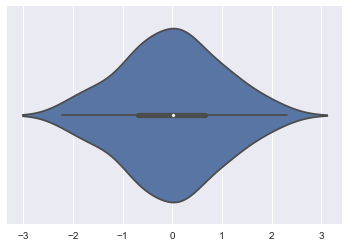

In [3]:
global sigma
global mu
sigma = 1
mu = 0
plot_violin(sigma, mu)

sigma_fs = widgets.FloatSlider(
    value=0.1,
    min=0.1,
    max=10,
    description="Sigma",
    continuous_update=False,
    orientation='horizontal')

def sigma_fs_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global sigma
        global mu
        clear_output()
        sigma = change['new']
        plot_violin(sigma, mu)
        
mu_fs = widgets.FloatSlider(
    value=0,
    min=0,
    max=100,
    description="Mu",
    continuous_update=False,
    orientation='horizontal')

def mu_fs_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global sigma
        global mu
        clear_output()
        mu = change['new']
        plot_violin(sigma, mu)
        
sigma_fs.observe(sigma_fs_on_change)
mu_fs.observe(mu_fs_on_change)
violin_controls = widgets.HBox([sigma_fs, mu_fs])
display(violin_controls)

### Regression Plotting
* The following cell plots a regression using the seaborn library
* The noise of the function can be adjusted with sliders

In [4]:
def gen_regression(x_shift, y_shift):
    x = np.linspace(0., 1., 50)
    y = x * 3. + 8.
    x_ = x + x_shift * np.random.randn(50)
    y_ = y + y_shift * np.random.randn(50)
    sns.regplot(x_, y_)

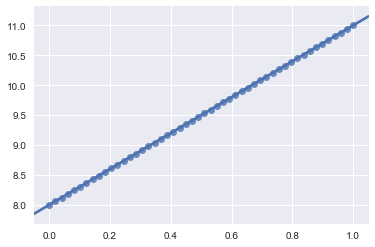

In [5]:
global x_shift
global y_shift
x_shift = 0
y_shift = 0

gen_regression(x_shift, y_shift)

x_fs = widgets.FloatSlider(
    value=0,
    min=0,
    max=1,
    description="X Randomness",
    disabled=False,
    continuous_update=False,
    orientation='horizontal')

def x_fs_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global x_shift
        global y_shift
        clear_output()
        x_shift = change['new']
        gen_regression(x_shift, y_shift)
        
y_fs = widgets.FloatSlider(
    value=0,
    min=0,
    max=10,
    description="Y Randomness",
    disabled=False,
    continuous_update=False,
    orientation='horizontal')

def y_fs_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global x_shift
        global y_shift
        clear_output()
        y_shift = change['new']
        gen_regression(x_shift, y_shift)
        
x_fs.observe(x_fs_on_change)
y_fs.observe(y_fs_on_change)
reg_controls = widgets.HBox([x_fs, y_fs])
display(reg_controls)

In [6]:
def gen_corr():
    x1 = np.random.randn(20)
    x2 = np.random.randn(20)
    x3 = np.random.randn(20)
    y1 = x1 - x2
    y2 = x1 + x2
    y3 = x1 + x2 - x3
    df = pd.DataFrame(dict(x1=x1, x2=x2, x3=x3, y1=y1, y2=y2, y3=y3))
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, square=True, cbar_kws={'shrink': .5})

### Correlation Matrix
* The following cell generates a random correlation matrix
* The button can be used to generate a new correlation matrix

In [7]:
corr_button = widgets.Button(description="Generate")

def on_corr_button_click(b):
    clear_output()
    gen_corr()

corr_button.on_click(on_corr_button_click)
display(corr_button)

### Bokeh Plotting
The following cells can be used to plot and visualize data using the Bokeh library.

The displayed Bokeh plot can be interacted with directly.

In [8]:
bkhio.output_notebook()

Loading BokehJS ...

In [9]:
plot = bkh.plotting.figure(width=500, height=300)

AttributeError: module 'bokeh' has no attribute 'plotting'

In [10]:
x = np.linspace(0., 10., 1000)
y = 3 * np.sin(x*2) + 2 * np.sin(x*10 + 10)

In [11]:
line = plot.line(x=x, y=y)

NameError: name 'plot' is not defined

In [12]:
bkhio.show(plot)

NameError: name 'plot' is not defined

In [13]:
plot2 = bkh.plotting.figure(width=500, height=300)

AttributeError: module 'bokeh' has no attribute 'plotting'

In [14]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers["species"]]

In [15]:
plot2.xaxis.axis_label = 'Sepal Length'
plot2.yaxis.axis_label = 'Sepal Width'
plot2.circle(flowers['sepal_length'], flowers['sepal_width'], 
             color=colors, fill_alpha=0.2, size=10)
bkhio.show(plot2)

NameError: name 'plot2' is not defined

In [17]:
plot3 = bkh.plotting.figure(width=500, height=300)
plot3.xaxis.axis_label = 'Petal Length'
plot3.yaxis.axis_label = 'Petal Width'
plot3.circle(flowers['petal_length'], flowers['petal_width'], 
             color=colors, fill_alpha=0.2, size=10)
bkhio.show(plot3)

In [17]:
type(flowers)

pandas.core.frame.DataFrame